In [ ]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [7]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

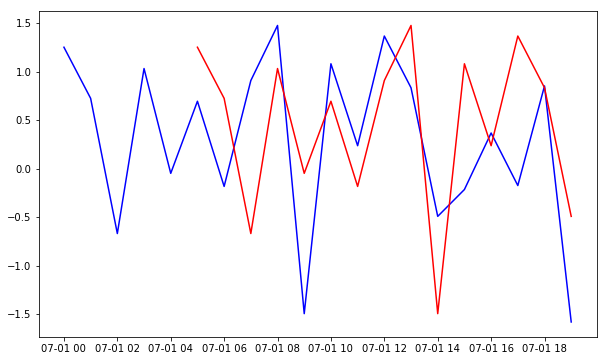

In [11]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the back' instead of into the past?

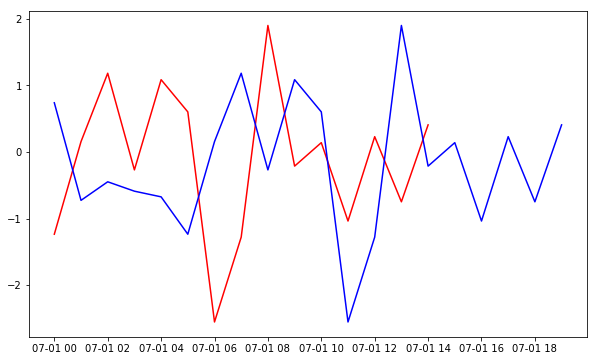

In [13]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(-5)
plt.plot(ts_lagged, color = 'red')
plt.plot(ts, color = 'blue')


# Window functions give you moving aggregate measures of a time series

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [14]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

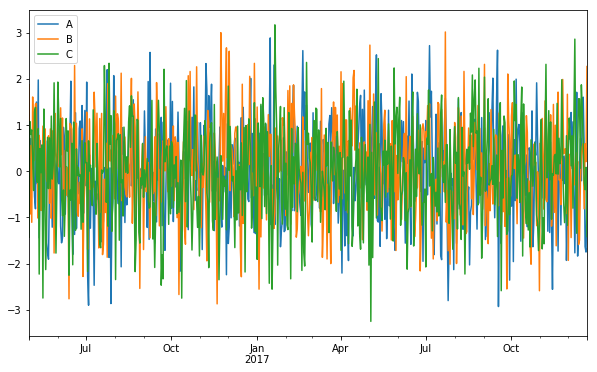

In [17]:
df.plot()

In [18]:
df.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-16', '2017-12-17', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21'],
              dtype='datetime64[ns]', length=600, freq='D')

In [19]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

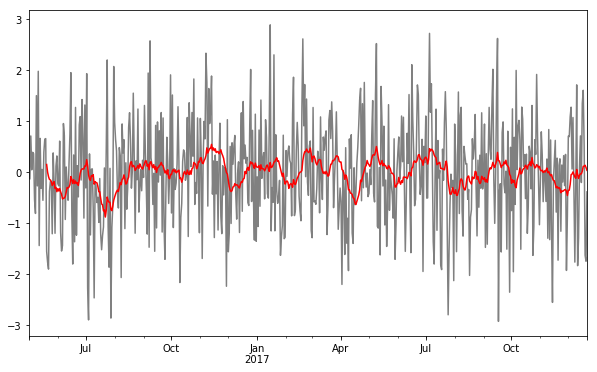

In [20]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

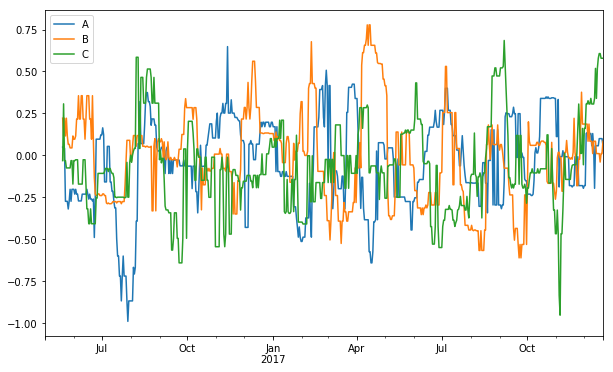

In [21]:
r.quantile(.5).plot()

### What about a custom function?

In [24]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[10:30]

,A,B,C
2016-05-11,16.928139,-0.500635,0.892418
2016-05-12,0.108294,-0.689595,2.899717
2016-05-13,1.073991,7.237334,-0.734628
2016-05-14,-0.657233,0.218205,-0.325935
2016-05-15,0.669894,0.700894,0.929693
2016-05-16,-0.543887,0.989606,-18.434864
2016-05-17,-5.464550,22.126527,0.308273
2016-05-18,-0.138726,-0.064915,-0.263329
2016-05-19,-1.366972,-1.318047,-0.413974
2016-05-20,-2.193986,1.801790,-4.536866


### What if I want to generate a rolling window function of monthly data from daily data?

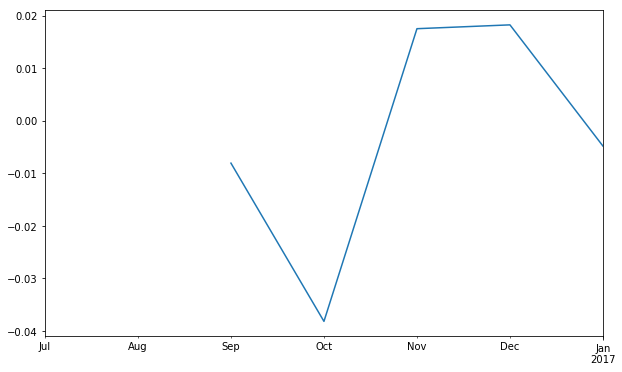

In [26]:
#%load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [27]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.535796,0.469334,-0.177685
2016-05-03,0.592244,0.497568,0.146452
2016-05-04,0.454597,0.096510,0.332471
2016-05-05,0.440606,0.398169,0.327399


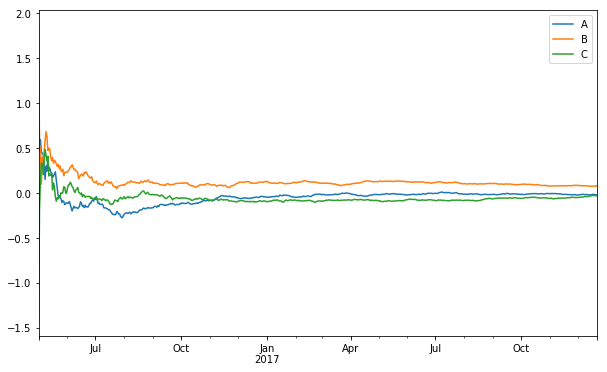

In [28]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a rolling window

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [ ]:
# %load snippets/window_funcs_try.py
